# Your info

Full name: keyvan dadashzadeh

Student ID:97522148

Notice: **You can add new cells for each part.**

# Q1.A. Kohonen

In [94]:
import numpy as np
from matplotlib import pyplot as plt
import random

class SOM():

  def __init__(self, w, h):
    self._w = w
    self._h = h
  
  def initmap(self, input_vector):
    self.weights = np.random.rand(self._h, self._w, 3)
    self.input_vector = input_vector / input_vector.max() #normalize

  def distance(self, input_vector, weight):
    return np.linalg.norm(input_vector - weight)

  def single_min_node(self, data_vect): #find minimum node from given data and return cordinates
      x = -1
      y = -1
      min_dist = np.Infinity
      for x_idx in range(self._w): 
        for y_idx in range(self._h):
          wieght = self.weights[x_idx, y_idx]
          dist = self.distance(data_vect, wieght)
          if min_dist > dist:
              min_dist = dist
              x = x_idx
              y = y_idx            
              
      return x, y, min_dist

  def all_min_nodes(self, input_vector):
    number_of_data = input_vector.shape[0]

    min_nodes_location = np.zeros((n_data, 2), dtype=np.int32)   
    min_nodes_distances = np.zeros((n_data), dtype=np.float32)   
    for idx in range(number_of_data):
        data_vect = input_vector[idx]
        x, y, min_dist = self.single_min_node(data_vect)         
        
        min_nodes_location[idx, 0] = y
        min_nodes_location[idx, 1] = x
        min_nodes_distances[idx] = min_dist

  def decay_function(self, x1, y1, x2, y2, radius): #function that take 2 point and check if points has influence based on distance
    distance = np.linalg.norm([x1 - x2, y1 - y2])
    if (distance > radius):
      return 0 #has 0 influence
    else: 
      return np.exp(-distance / (2 * radius**2))
  
  def decay_itreate_based_function(self, x1, y1, x2, y2, radius, iter, const): #shit
    distance = np.linalg.norm([x1 - x2, y1 - y2])
    if (distance > radius): 
      return 0 
    else:
      return np.exp(-distance / (2 * (radius * np.exp(-iter / const)) **2))

  
  def fit(self, iters, learning_rate=0.1): #fiting data
    radius = 10
    const = iters / np.log(radius)
    for iter in range(iters):
      data_vector = random.choice(self.input_vector) #pick random data

      x1, y1, min_dist = self.single_min_node(data_vector) #find node with minimum distance from picked data

      for x in range(self._w):
        for y in range(self._h):
          delta = self.decay_function(x, y, x1, y1, radius)
          self.weights[x, y, :] = self.weights[x, y] + (learning_rate * delta * (data_vector - self.weights[x, y])) #update other neighbors node if has influence


  def plot_on_map(self): #plot on map
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('First Input')
    ax1.imshow(self.input_vector.reshape(self._w, self._h, 3)) #reshape in order to draw image 
    ax2.set_title('Result')
    ax2.imshow(self.weights)
    plt.show()




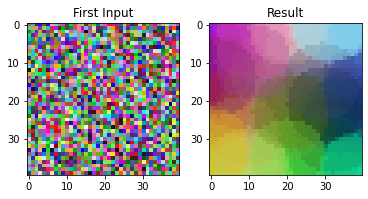

In [90]:
data = np.random.randint(0, 255, (1600, 3))

som = SOM(40, 40)
som.initmap(data)
som.fit(600, 0.3)
som.plot_on_map()

# Q1.B. Kohonen

In [92]:


class SOMS(SOM):

  def __init__(self, w, h):
    self._w = w
    self._h = h
    super().__init__(w, h)

  def fit(self, iters, learning_rate=0.1): #fiting data
    radius = 10
    const = iters / np.log(radius)
    for iter in range(iters):
      data_vector = random.choice(self.input_vector) #pick random data

      x1, y1, min_dist = self.single_min_node(data_vector) #find node with minimum distance from picked data
      new_learning_rate = learning_rate * np.exp(- iter / iters) #in every iteration we have new learning_rate

      for x in range(self._w):
        for y in range(self._h):
          delta = self.decay_function(x, y, x1, y1, radius)
          self.weights[x, y, :] = self.weights[x, y] + (new_learning_rate * delta * (data_vector - self.weights[x, y])) #update other neighbors node if has influence



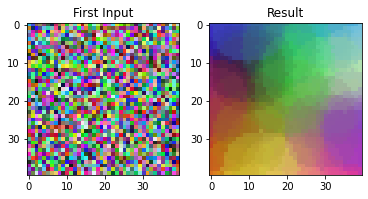

In [93]:

data = np.random.randint(0, 255, (1600, 3))

som = SOMS(40, 40)
som.initmap(data)
som.fit(1000, 0.5)
som.plot_on_map()



In [95]:


class SOMSS(SOM):

  def __init__(self, w, h):
    self._w = w
    self._h = h
    super().__init__(w, h)

  def fit(self, iters, learning_rate=0.1): #fiting data
    radius = 20
    const = iters / np.log(radius)
    for iter in range(iters):
      data_vector = random.choice(self.input_vector) #pick random data

      x1, y1, min_dist = self.single_min_node(data_vector) #find node with minimum distance from picked data
      new_learning_rate = learning_rate * np.exp(- iter / iters) #in every iteration we have new learning_rate

      for x in range(self._w):
        for y in range(self._h):
          delta = self.decay_itreate_based_function(x, y, x1, y1, radius, iter, const) #also decrease radius this time
          self.weights[x, y, :] = self.weights[x, y] + (new_learning_rate * delta * (data_vector - self.weights[x, y])) #update other neighbors node if has influence


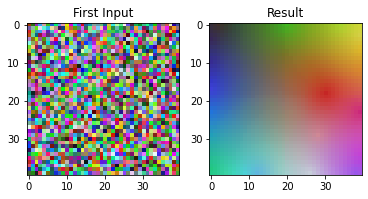

In [96]:

data = np.random.randint(0, 255, (1600, 3))

som = SOMSS(40, 40)
som.initmap(data)
som.fit(1000, 0.5)
som.plot_on_map()

# Q2.A. MLP

In [101]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pylab as plt

model = Sequential()
model.add(Dense(30, input_shape=(1,), activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 30)                60        
_________________________________________________________________
dense_32 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 16        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
40/40 [==============================] - 0s 1ms/step - loss: 0.3896 - accuracy: 0.0000e+00
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1386 - accuracy: 0.0000e+00
Epoch 3/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1261 - accuracy: 0.0000e+00
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1222 - accuracy: 0.0000e+00
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.0000e+00
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1061 - accuracy: 0.0000e+00
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.0000e+00
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.0000e+00
Epoch 9/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1015 - accuracy: 0.0000e+00
Epoch 10/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0775 - 

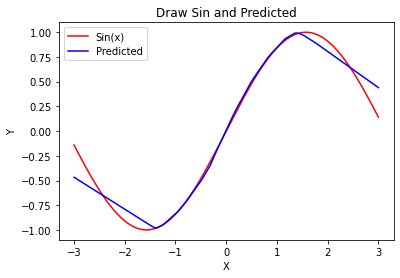

In [98]:
x = np.linspace(-3, 3, 200)
y = np.sin(x)
model.fit(x, y, epochs=50, batch_size=5)

scores = model.evaluate(x, y)
print(model.metrics_names[1], scores[1] * 100)

preicted = model.predict(x)
plt.plot(x, y, color='red', label="Sin(x)")
plt.plot(x, preicted, color='blue', label="Predicted")
plt.title("Draw Sin and Predicted")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Q2.B. RBF

In [102]:
import matplotlib.pyplot as plt
import numpy as np


class RBF():
    def __init__(self, layers, sigma=1.0):
        self.layers = layers
        self.sigma = sigma

    def guassian_function(self, center, x):
        return np.exp(- self.sigma * np.linalg.norm(center-x) ** 2)

    def get_matrix(self, input_arr):
        matrix = np.zeros((len(input_arr), self.layers))
        for data_idx, data in enumerate(input_arr):
            for center_idx, center in enumerate(self.centers):
                matrix[data_idx, center_idx] = self.guassian_function(center, data)
        return matrix

    def get_centers(self, input_arr):
        random_args = np.random.choice(len(input_arr), self.layers)
        centers = input_arr[random_args]
        return centers

    def fit(self, input_arr, y):
        self.centers = self.get_centers(input_arr)
        result = self.get_matrix(input_arr)
        self.weights = np.dot(np.linalg.pinv(result), y)

    def predict(self, input_arr):
        predict_matrix = self.get_matrix(input_arr)
        predictions = np.dot(predict_matrix, self.weights)
        return predictions

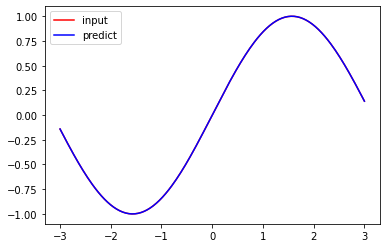

In [100]:
x = np.linspace(-3, 3, 200)
y = np.sin(x)

model = RBF(layers=50, sigma=1.)
model.fit(x, y)
y_pred = model.predict(x)

plt.plot(x, y, 'red', label='input')
plt.plot(x, y_pred, 'blue', label='predict')
plt.legend()
plt.show()

# Q2.C. Compare

Epoch 1/50
40/40 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.0000e+00
Epoch 2/50
40/40 [==============================] - 0s 990us/step - loss: 0.3431 - accuracy: 0.0000e+00
Epoch 3/50
40/40 [==============================] - 0s 940us/step - loss: 0.3132 - accuracy: 0.0000e+00
Epoch 4/50
40/40 [==============================] - 0s 989us/step - loss: 0.2992 - accuracy: 0.0000e+00
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2589 - accuracy: 0.0000e+00
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2322 - accuracy: 0.0000e+00
Epoch 7/50
40/40 [==============================] - 0s 985us/step - loss: 0.1993 - accuracy: 0.0000e+00
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1828 - accuracy: 0.0000e+00
Epoch 9/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1523 - accuracy: 0.0000e+00
Epoch 10/50
40/40 [==============================] - 0s 931us/step - loss:

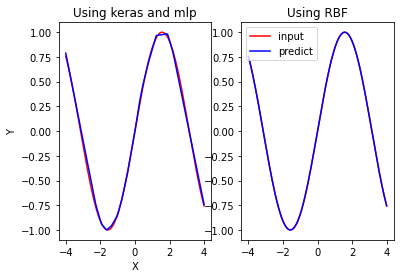

In [103]:
x = np.linspace(-4, 4, 200)
y = np.sin(x)

fig, (ax1, ax2) = plt.subplots(1, 2)

model.fit(x, y, epochs=50, batch_size=5)

scores = model.evaluate(x, y)

preicted = model.predict(x)
ax1.plot(x, y, color='red', label="Sin(x)")
ax1.plot(x, preicted, color='blue', label="Predicted")
ax1.set_title("Using keras and mlp")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

model = RBF(layers=50, sigma=1.)
model.fit(x, y)
y_pred = model.predict(x)

ax2.set_title("Using RBF")
ax2.plot(x, y, 'red', label='input')
ax2.plot(x, y_pred, 'blue', label='predict')

plt.legend()
plt.show()

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
   

  according to the question number.
  - There are 2 assignments in Gradescope: 

    You should upload your **codes** and your **notebook** in `HW2` section and your final report for all of the questions as a **single pdf** file in `HW2 - Report`. Autograder will automatically check for:
    - `CI992_HW2.ipynb`
    - `Q1.A. Kohonen.py`
    - `Q1.B. Koohonen.py`
    - `Q2.A. MLP.py`
    - `Q2.B. RBF.py`
    - `Q2.C. Compare.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.